# spaCy


spaCy is a well-known library in *natural language processing* domain in Python. In this notebook I start with the fundamentals that are used in spaCy.

To create a blank English pipeline, I can simply call it by the "spacy.blank" method as follows: 

In [ ]:
import spacy

nlp = spacy.blank('en')

### Tokenizing

In [4]:
doc = nlp("Hello world 2022!.")

for token in doc:
    print(token.text)

Hello
world
2022
!
.


To get more information about the tokens we can use the *is_alpha*, *is_punct*, and *like_num* to identify the token type:

In [11]:
for token in doc:
    if token.is_alpha == True:
        print(token, ' has charactors')
    elif token.is_digit == True:
        print(token, ' is a digit')
    elif token.is_punct == True:
        print(token, ' is a pucntuations')

Hello  has charactors
world  has charactors
2022  is a digit
!  is a pucntuations
.  is a pucntuations


### Lexical attributes


Below I want to dig into a text to find the lexical attributes.

In [18]:
doc = nlp(" In 1990 more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

for token in doc:
          if token.like_num:
            next_token = doc[token.i+1]
            if next_token.text == "%":
                print("Percentage found:", token.text)
          

Percentage found: 60
Percentage found: 4


### Trained Pipeline

The *trained pipeline* components have statistical models which makes predictions in the context. This does speech tags, and named entities. 
* Part-of-speech tags
* Syntactic dependencies
* Named entities

* Trained on labeled example texts
* Can be updated with more examples to fine-tune predicitons

spaCy has pre-trained packages such as "en_core_web_sm" which has the *binary weights*, *vocabulary*, *meta information*, and *configuration file*. Let's load the package and find out what are the tokens roles in the sentences. 

In [31]:
nlp = spacy.load("en_core_web_sm")

text = "I love hamburger and pizza and I love to eat in the cozy restaurants"

doc = nlp(text)

for token in doc:
    print(token.text, token.pos_)

I PRON
love VERB
hamburger NOUN
and CCONJ
pizza NOUN
and CCONJ
I PRON
love VERB
to PART
eat VERB
in ADP
the DET
cozy ADJ
restaurants NOUN


Now let's find out the dependecy and parent labels


In [32]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

I PRON nsubj love
love VERB ROOT love
hamburger NOUN dobj love
and CCONJ cc hamburger
pizza NOUN conj hamburger
and CCONJ cc love
I PRON nsubj love
love VERB conj love
to PART aux eat
eat VERB xcomp love
in ADP prep eat
the DET det restaurants
cozy ADJ amod restaurants
restaurants NOUN pobj in


above *nsubj* means *nominal subject*, *dobj* means *direct object*, and *det* means *determiner*. Now what about the *Name Entities* (labels)? The labels can be:
* Money
* GPE
* organizaition
...

in spaCy the trained labeled data is not included in the pipeline package that we load. 

In [36]:
text = "Apple is a big company and it has more than $1 billion money in the USA"

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
more than $1 billion MONEY
USA GPE


To know what the entities are you can use the *explain* function:

In [37]:
spacy.explain("GPE")

'Countries, cities, states'

In [38]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [39]:
spacy.explain("MONEY")

'Monetary values, including unit'

In [43]:
for token in doc:
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    
    print(token_text,",",token_pos,",",token_dep)

Apple , PROPN , nsubj
is , AUX , ROOT
a , DET , det
big , ADJ , amod
company , NOUN , attr
and , CCONJ , cc
it , PRON , nsubj
has , VERB , conj
more , ADJ , amod
than , SCONJ , quantmod
$ , SYM , quantmod
1 , NUM , compound
billion , NUM , nummod
money , NOUN , dobj
in , ADP , prep
the , DET , det
USA , PROPN , pobj


### Ruled Based Matching

Here we are going to understand the role of each token and search for it precisely. In spaCy we can define match patterns which are the lists of dictionaries and eacch dictionary has one token. The keys are the names of token attributes, mapped to their expexted values. 

In [51]:
from spacy.matcher import Matcher

text = "The new generation of iPhone  is iPhone 13 and it had huge sell."
doc = nlp(text)

# initialize the matcher
matcher = Matcher(nlp.vocab)

# create a pattern matching 
pattern = [{"TEXT":"iPhone"},{"IS_DIGIT":True}]

# add the patter to the matcher
matcher.add("IPHONE_13_Pattern",[pattern])

# let's use the matcher to find the words from the pattern
matches = matcher(doc)
print("Matches: ",[doc[start:end].text for match_id, start, end in matches])

Matches:  ['iPhone 13']


In [55]:
text = "I download the Fronite on my laptop and I can't find it. I need help? I downloaded the Minecraft, and I updated the windows version.\
I also need to download Visual Studio Code."

pattern = [{"LEMMA":"download"},{"POS":"PROPN"}]

matcher.add("Download_pattern",[pattern])

doc = nlp(text)

matches = matcher(doc)

for match_id, start, end in matches:
    print(doc[start:end].text)

download Visual


The pattern below is used to find adjectives followed by one or two nouns.

In [58]:
text = "The tree as beautiful and the our planet is wonderful. The nature is a smart brain and good teacher"

pattern = [{"POS":"ADJ"},{"POS":"NOUN"},{"POS":"NOUN","OP":"?"}]
matcher.add("pattern",[pattern])
doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print(doc[start:end].text)

smart brain
good teacher


## Large-scale data analysis 

In spaCy the *Vocab* stores data shared accross multiple documents which spaCy encodes all strings to *hash values*. the string store is available as nlp.vocab.strings. For each vocab there is a hash value.

In [59]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

In [60]:
coffee_string

'coffee'

In [61]:
text = "I love coffee"
print("hash value:", nlp.vocab.strings["coffee"])

hash value: 3197928453018144401


In [62]:
doc = nlp(text)
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


#### The Doc object:

In spaCy we can import the Doc class from *spacy.tokens*. 

In [63]:
from spacy.tokens import Doc

words = ["hello", "world", "!"]
spaces = [True, False, False]

doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [69]:
doc.text

'hello world!'

In [74]:
nlp = spacy.blank("en")

words = ["Go",",","get","started","!"]
spaces = [False, True, True, False, False]

doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


#### Span object
The *span* is a slice of a doc including one or more tokens. *Span* takes three arguments: the doc, the start indext, and the end index.

In [65]:
from spacy.tokens import Span

span = Span(doc, 0, 2)

span

hello world

#### Word vectors and semantic similarity

In spaCy we can use the language libraries to compare the similarity of Doc, Token and Span which it returns a value between 0 and 1. The similarity calculated based on vectorizing the words, tokens and etc. For example:

In [ ]:
spacy.cli.download("en_core_web_md")

In [78]:
nlp = spacy.load("en_core_web_md")

doc1 = nlp("I like pizza")
doc2 = nlp("I like hamburger")

print(doc1.similarity(doc2))

0.924156668141948


similarity between the tokens:

In [82]:
text = "I love pizza and chicken and pasta"

doc = nlp(text)

token_1 = doc[2]
token_2 = doc[4]
token_3 = doc[6]

print(token_1.similarity(token_2))
print(token_2.similarity(token_3))

0.6417259
0.6634508


In [85]:
span = doc[3:6]
print(span.similarity(doc))

0.8544537835740976


#### Combining predictions and rules

##### Ruled based matching

In [91]:
matcher = Matcher(nlp.vocab)

# the pattern below is a list of dictionaries
pattern = [{"LEMMA":"love","POS":"VERB"},{"LOWER":"cats"}]
matcher.add("LOVE_CATS",[pattern])

# the pattern below shows how often a token should be matched
pattern =[{'TEXT':"very","OP":"+"},{"TEXT":"happy"}]
matcher.add("VERY_HAPPY",[pattern])

doc = nlp("I love cats and also I love dogs and I am happy about it")
matches = matcher(doc)

print("Matches: ",[doc[start:end].text for match_id, start, end in matches])

Matches:  ['love cats']


##### PhraseMatcher

This matcher is faster and it gives the match ID, and the start and end of the match.

In [97]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

text_pattern = "King's watches"
pattern = nlp(text_pattern)

matcher.add("Gold",[pattern])

text = "many people love to have King's watches"
doc = nlp(text)

print("Matches: ",[doc[start:end].text for match_id, start, end in matcher(doc)])

Matches:  ["King's watches"]


## Processing Pipelines

Built-in pipeline components

    Name    Description              Creates
    tagger  Part-of-speech tagger    Token.tag, Token.pos
    parser  Dependency parser        Token.dep, Token.head, Doc.sents, Doc.noun_chunks
    ner     Named entity recognizer  Doc.ents, Toekn.ent_iob, Token.ent_type
    textcat Text classifer           Doc.cats
    

To know the list of pipeline component names:

*nlp.pipe_names*

*nlp.pipeline*

#### Custom pipeline components

With this we can have our own values based on tokens and their attributes plus adding named entities. As an example below we want to create a pattern which has the annimals' names and at the end we print the entity text and entity label.

In [106]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_md")
animals = ["cat","turtule","Golden Retriever","Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))

In [103]:
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# define custom component
@Language.component("animal_component")
def animal_component_function(doc):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    doc.ents = spans
    return doc

animal_patterns: [cat, turtule, Golden Retriever, Rattus norvegicus]


In [104]:
# Add the component to the pipline after the "ner" component

nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'ner', 'animal_component', 'attribute_ruler', 'lemmatizer']


In [105]:
doc = nlp("I have a cat and Golden Reriever")
print([(ent.text, ent.label_) for ent in doc.ents])

[('cat', 'ANIMAL')]


#### Find the country names in the text

In [112]:
import json

with open("countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
    
nlp = spacy.blank("en")

text = "Germany, Turkey, USA and Finland had a meeting yesterday."

doc = nlp(text)

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# use matcher to find the countries
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Germany, Turkey, Finland]


In [117]:
#### Find the relationship between countries

with open("countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
    
with open("country_text.txt", encoding="utf8") as f:
    Text = f.read()

Text

'After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a "false renaissance" for the organization, given the more troubled missions that followed. Though the UN Charter had been written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous, serious crises within nations su

In [118]:
matcher = PhraseMatcher(nlp.vocab)

patterns = list(nlp.pipe(COUNTRIES))

matcher.add("COUNTRY", patterns)

doc = nlp(Text)
doc.ents = []

for match_id, start, end in matcher(doc):
    # create a label for the span as GPE
    span = Span(doc, start, end, label = "GPE")
    
    # write the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]
    
    # get the span's root head token
    span_root_head = span.root.head
    print(span_root_head.text, "-->", span.text)
    
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

Namibia --> Namibia
South --> South Africa
Cambodia --> Cambodia
Kuwait --> Kuwait
Somalia --> Somalia
Haiti --> Haiti
Mozambique --> Mozambique
Somalia --> Somalia
Rwanda --> Rwanda
Singapore --> Singapore
Sierra --> Sierra Leone
Afghanistan --> Afghanistan
Iraq --> Iraq
Sudan --> Sudan
Congo --> Congo
Haiti --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Somalia', 'GPE'), ('Rwanda', 'GPE'), ('Singapore', 'GPE'), ('Sierra Leone', 'GPE'), ('Afghanistan', 'GPE'), ('Iraq', 'GPE'), ('Sudan', 'GPE'), ('Congo', 'GPE'), ('Haiti', 'GPE')]


### Processing Pipelines

Image below shows the process of calling the *nlp* engine:

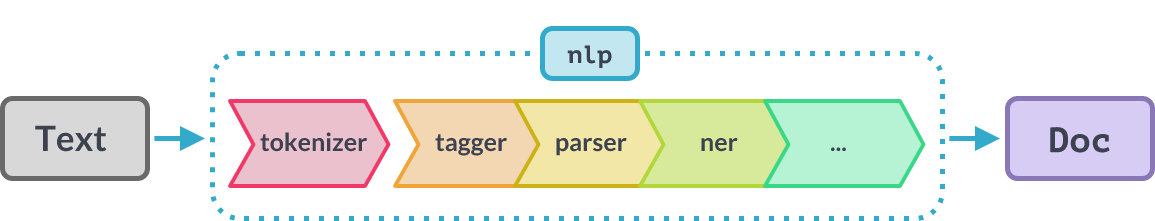


The biult-in pipeline components are:

    Name       Description             Creates
    tagger     Part-of-speech-tagger   Token.tag, Token.pos
    parser     Dependency parser       Token.dep, Token.head, Doc.sents, Doc.noun_chunks
    ner        Named entity recognizer Doc.ents, Token.ent_iob, Token.ent_type
    textcat    Text classifier         Doc.cats

In [120]:
nlp = spacy.load("en_core_web_md")

print("nlp pipelines:\n", nlp.pipe_names)

nlp pipelines:
 ['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']


#### Custom pipeline components

How to add each components in the pipeline?

    Argument      Description          Example
    last          If True, add last    nlp.add_pipe("component", last = True)
    first         If True, add first   nlp.add_pipe("component", first = True)
    before        Add before component nlp.add_pipe("component", before = "ner")
    after         Add after component  nlp.add_pipe("component", after = "tagger")
    
    
Below is showing a very simple custom pipeline. The function: custom_component_function reads the doc file and the *nlp.add_pipe* locates our custome component in the pipeline.

In [ ]:
nlp = spacy.load("en_core_web_sm")

def custome_component_function(doc):
    print("Doc length: ", len(doc))
    return doc

nlp.add_pipe("custom_component", first=True)

print("Pipeline:\n", nlp.pipe_names)

Example 1:

In [123]:
from spacy.language import Language

@Language.component("length_component") # here the component name is "length_component" and it is added to the pip
def length_component_function(doc): # here we define the length_component component by a function
    doc_length = len(doc)
    print("This document is "+str(doc_length)+" tokens long.")
    return doc

nlp = spacy.load("en_core_web_sm")

nlp.add_pipe("length_component", first=True)
print(nlp.pipe_names)

doc = nlp("Hello wonder world!")

['length_component', 'tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']
This document is 4 tokens long.


Example 2:

In this example we are going to use the PhraseMatcher to find the animal names in the document and adds the matched spans to the don.ents

In [127]:
nlp = spacy.load("en_core_web_md")

animals = ["Golder Retriver", "cats", "turtles", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)

matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

@Language.component("animal_component")
def animal_component_function(doc):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label ="ANIMAL") for match_id, start, end in matches]
    doc.ents = spans
    return doc

# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

#process the text
text = "cats are cute and dogs are lovely. Turtles are different"
doc = nlp(text)
print( [ (ent.text, ent.label_) for ent in doc.ents ] )

animal_patterns: [Golder Retriver, cats, turtles, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'ner', 'animal_component', 'attribute_ruler', 'lemmatizer']
[('cats', 'ANIMAL')]


#### Setting extension attributes

In [140]:
del nlp, Token

In [147]:
nlp = spacy.blank("en")
from spacy.tokens import Token

# register the token extension attribute "is_country"
Token.set_extension("is_country", default = True)

text = "I love Italy and Spain."
doc = nlp(text)
doc[3]._.is_country = True

print( [(token.text, token._.is_country) for token in doc] )

[('I', True), ('love', True), ('Italy', True), ('and', True), ('Spain', True), ('.', True)]


#### Reversed extensions

Reversing each tokens in the text:

In [148]:
nlp = spacy.blank("en")

def get_reversed(token):
    return token.text[::-1]

Token.set_extension("reversed", getter = get_reversed)

text = "All documents are wrong, and it is true"

doc = nlp(text)

for token in doc:
    print("reversed:", token._.reversed)

reversed: llA
reversed: stnemucod
reversed: era
reversed: gnorw
reversed: ,
reversed: dna
reversed: ti
reversed: si
reversed: eurt


In [149]:
nlp = spacy.blank("en")

def get_has_number(doc):
    return any(token.like_num for token in doc)

Doc.set_extension("has_number", getter=get_has_number)

text = "He was born in 1920 and found his family in 1960 after 40 years!"

doc = nlp(text)

print("has_number: ", doc._.has_number)

has_number:  True


### add extensions to the span

Below *get_wikipedia_url* is an extension which checks the url if it has one of the labels:
    
    Person
    ORG
    GPE
    LOCATION
    
Let's dive into it!

In [153]:
nlp = spacy.load("en_core_web_sm")


def get_wikipedia_url(span):
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text
    
#Span.set_extension("wikipedia_url", getter=get_wikipedia_url)


text = "In over fifty years from his very fist recordings right through to his last album, David Bowie was at the vanguard of contemporary culture."

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent._.wikipedia_url)

over fifty years None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


#### Good tips to save time to run the code

##### Passing in context
set *as_tuples=True* on *nlp.pipe* lets you pass in (text,context) tuples which yeilds (doc,context) tuples which is useful for associating metadata with the *doc*

In [154]:
data = [
    ("This is a text", {"id":1, "page_number":15}),
    ("Another text", {"id":2, "page_number":16})
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

This is a text 15
Another text 16


In [155]:
from spacy.tokens import Doc


Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id":1, "page_number":15}),
    ("Another text", {"id":2, "page_number":16})
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]


To convert the text to a doc file it is better to do so:

bad:

In [156]:
doc = nlp("hello world")

good:

In [157]:
doc = nlp.make_doc("hello world")

#### Running only some feature of the pipeline 

In [166]:
nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

text = "hello wonderful world. His name is famous VIP"

with nlp.select_pipes(disable=["lemmatizer", "parser"]):
    doc = nlp(text)
    print(doc.ents)

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']
()


#### revisiting the efficient coding in spacy

look at the code below. The texts are process in a for loop one by one but we can do better!

In [ ]:
with open("tweets.jso", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
    
    
for text in TEXTS:
    doc = nlp(text)
    print( [token.text for token in doc if toekn.pos_ == "ADJ"] )

Now the new look:

In [ ]:
with open("tweets.jso", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
    
    
for doc in nlp.pipe(TEXTS):
    print( [token.text for token in doc if toekn.pos_ == "ADJ"] )

##### second example

In [ ]:
with open("tweets.jso", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
    
    
docs = [nlp(text) for text in TEXTS]
entities = [doc.ents for doc in docs]
print(*entities)

Here let's use the list to remove the for loop

In [ ]:
with open("tweets.jso", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
    
    
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

##### Third example

In [ ]:
people = ["Man","Boy","Girl","Lady"]

patterns = [nlp(person) for person in people]

Let's use the list

In [167]:
people = ["Man","Boy","Girl","Lady"]

patterns = nlp.pipe(people)

##### Fourth example

Below the json file is imported and the key values such as *author*, *book* and the *text* are printed here

In [169]:
with open("bookquotes.json", encoding="utf8") as f:
    DATA = json.loads(f.read())
    
nlp = spacy.blank("en")

Doc.set_extension("author", default=None)

Doc.set_extension("book", default=None)

for doc, context in nlp.pipe(DATA, as_tuples = True):
    doc._.book = context["book"]
    doc._.author = context["author"]
    print(f"{doc.text}\n-'{doc._.book}'by {doc._.author}\n")

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.
-'Metamorphosis'by Franz Kafka

I know not all that may be coming, but be it what it will, I'll go to it laughing.
-'Moby-Dick or, The Whale'by Herman Melville

It was the best of times, it was the worst of times.
-'A Tale of Two Cities'by Charles Dickens

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.
-'On the Road'by Jack Kerouac

It was a bright cold day in April, and the clocks were striking thirteen.
-'1984'by George Orwell

Nowadays people know the price of everything and the value of nothing.
-'The Picture Of Dorian Gray'by Oscar Wilde



##### disable some of the pipelines:

In [172]:
nlp = spacy.load("en_core_web_sm")

text = (
"chick-fill A is an American fast food restaurant chain headquarted in the city of College Park, Georgia, specializing in chicken sandwitches"
)

with nlp.select_pipes(disable=["tagger", "lemmatizer"]):
    doc = nlp(text)
    print(doc.ents)

(American, College Park, Georgia)


## Training the Neural Network Models

Here you learn about the spaCy's statistical models which you can modify and train them. Below shows the flow of training the models:

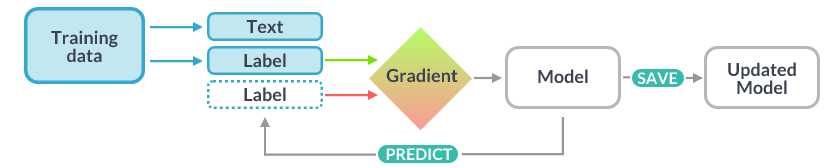

Below are the steps to train the model:
* Examples we need the model to predict them
* Update the existing model usually with a few thousand examples
* Train a new category: a few thousands to million examples

let's create a corpus to train the model:


In [175]:
nlp = spacy.blank("en")

doc1 = nlp("iPhone X is coming")
doc1.ents = [Span(doc1, 0, 2, label="GADGET")]

doc2 = nlp("I need a new phone! Any tips?")

docs = [doc1, doc2]
docs

[iPhone X is coming, I need a new phone! Any tips?]

Now split the data into two parts:
* Training data
* Developement data


In [180]:
import numpy as np

np.random.shuffle(docs)

train_docs = docs[:len(docs)//2]
dev_docs = docs[len(docs)//2:]

print(train_docs)
print(dev_docs)

[I need a new phone! Any tips?]
[iPhone X is coming]


Saving the data is wise. The *DocBin* is the container which efficiently stores and saves *Doc* objects. *DocBin* is faster and produces smaller file sizes because it only stores the shared vocabulary once. 

In [ ]:
train_docbin = DocBin(docs=train_docs)
train_docbin.to_disk("train.spacy")

dev_docbin = DocBin(docs=dev_docs)
dev_docbin.to_disk("dev.spacy")

To convert the data you can use the *spacy convert* which supports .conll, conllu, .iob and json formats.

#### Example of labeling the entities in the corpus

In [1]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("en")

doc1 = nlp("Reddit partners with Patreon to help creators build commuties")

doc1.ents = [
    Span(doc1, 0, 1, label="WEBSITE"),
    Span(doc1, 3, 4, label="WEBSITE")
]

doc2 = nlp("PewDiePie smashes YouTube record")
doc2.ents = [
    Span(doc2, 0, 1, label="PERSON"),
    Span(doc2, 3, 4, label="WEBSITE")
]

doc3 = nlp("Reddit founder gave away two Metallica tickests to fans")
doc3.ents =[
    Span(doc3, 0, 1, label="WEBSITE")
]

In [3]:
doc3.ents

(Reddit,)